In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from category_encoding import metrics, exp, encoders, default_datasets

In [3]:
model_conf = [
    {
        'model_cls': LogisticRegression,
        'type': 'linear'
    },
    {
        'model_cls': RandomForestClassifier,
        'type': 'tree',
        'fargs': {
            'n_estimators': 10
        }
    }
]

In [4]:
metrics_conf = [
    {
        'metric_name': 'diff_metrics'
    },
    {
        'metric_name': 'feature_importances'
    },
    {
        'metric_name': 'shap'
    },
]

In [5]:
configs = {
    'datas': '../configs/data_config.json',
    'encoders': '../configs/encoder_configs.json',
    'models': model_conf,
    'metrics': metrics_conf
}

In [6]:
res = exp.run_exp(configs, n_jobs=-2)

100%|██████████| 2/2 [00:00<00:00,  2.03it/s]
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
Calculate metric with config:
{'metric_name': 'diff_metrics'}
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-2)]: Done   2 out of   4 | elapsed:   14.7s remaining:   14.7s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:   14.9s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
Calculate metric with config:
{'metric_name': 'feature_impo

In [7]:
def one_to_pandas(results):
    df = dict()
    for result_name, result in results.items():
        df[result_name] = pd.DataFrame(columns=['data', 'transformer', 'model'] + list(result[0]['metric'].keys()))

        for res in result:
            _df = pd.DataFrame(columns=df[result_name].columns)
            for metric_name, metric in res['metric'].items():
                _df[metric_name] = metric
            _df['data'] = res['data']
            _df['transformer'] = res['transformer']
            _df['model'] = res['model']
            df[result_name] = df[result_name].append(_df)
    return df

In [8]:
res['shap'][1]['metric']['shap'].shape

(30,)

In [9]:
df = one_to_pandas(res)

In [10]:
df['feature_importances']

,data,transformer,model,feature_importances,orig_feat_names,enc_feat_names
0,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,0.000000,intercept,intercept
1,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,0.011472,gender,gender
2,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,0.079038,SeniorCitizen,SeniorCitizen
3,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,0.000992,Partner,Partner
4,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,0.069984,Dependents,Dependents
...,...,...,...,...,...,...
32,Telco Customer Churn,BaseNEncoder + StandardScaler,RandomForestClassifier,0.014450,PaymentMethod,PaymentMethod_0
33,Telco Customer Churn,BaseNEncoder + StandardScaler,RandomForestClassifier,0.020909,PaymentMethod,PaymentMethod_1
34,Telco Customer Churn,BaseNEncoder + StandardScaler,RandomForestClassifier,0.018134,PaymentMethod,PaymentMethod_2
35,Telco Customer Churn,BaseNEncoder + StandardScaler,RandomForestClassifier,0.166762,MonthlyCharges,MonthlyCharges


In [12]:
fe = df['feature_importances']

In [24]:
cat_fe = (
    fe[fe['orig_feat_names'] != fe['enc_feat_names']]
    .groupby(['data', 'transformer', 'model', 'orig_feat_names'])
    .mean()
    .reset_index()
)

In [25]:
import seaborn as sns

In [26]:
cat_fe

,data,transformer,model,orig_feat_names,feature_importances
0,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,Contract,0.317702
1,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,DeviceProtection,0.073877
2,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,InternetService,0.333301
3,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,OnlineBackup,0.092389
4,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,OnlineSecurity,0.151604
5,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,PaymentMethod,0.077185
6,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,StreamingMovies,0.153880
7,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,StreamingTV,0.151269
8,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,LogisticRegression,TechSupport,0.145238
9,Telco Customer Churn,BackwardDifferenceEncoder + StandardScaler,RandomForestClassifier,Contract,0.034885


In [32]:
sns.rel(x='orig_feat_names', y='feature_importances', hue='transformer', data=cat_fe[cat_fe['data'] == 'Telco Customer Churn'])

TypeError: distplot() got an unexpected keyword argument 'y'

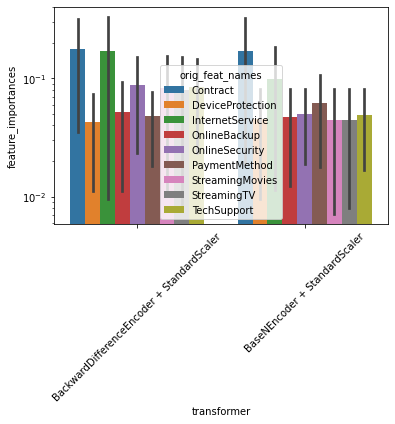

In [34]:
g = sns.barplot(
    x='transformer', 
    y='feature_importances', 
    hue='orig_feat_names', 
    data=cat_fe[cat_fe['data'] == 'Telco Customer Churn']
)
g.set_yscale('log')
for item in g.get_xticklabels():
    item.set_rotation(45)